## SUPINFO TP Machine Learning  : Détection de Cancer du Sein (Classification)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Chargement des données

In [2]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Aperçu
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Analyse exploratoire

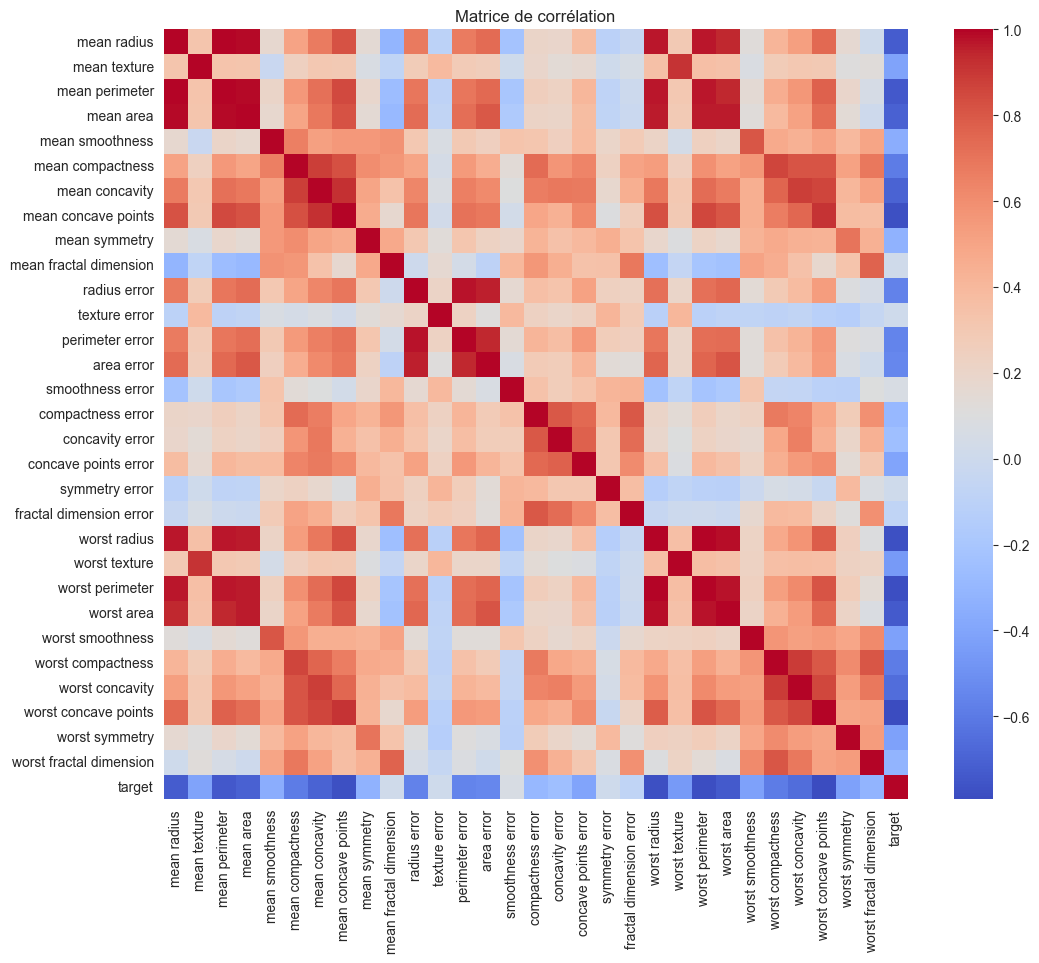

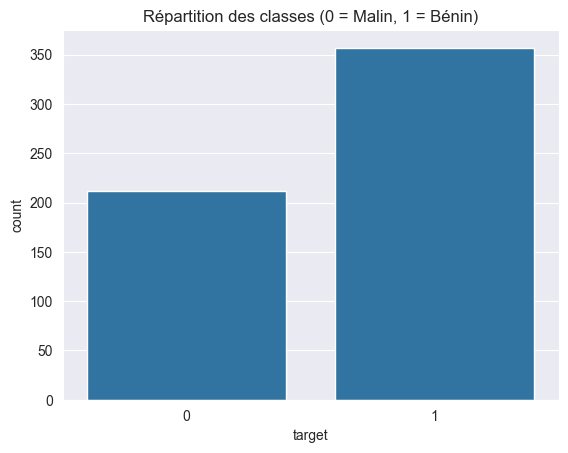

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

# Distribution des classes
sns.countplot(x='target', data=df)
plt.title("Répartition des classes (0 = Malin, 1 = Bénin)")
plt.show()


## Séparation des données

In [4]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modèle 1 : Régression Logistique

In [5]:
pipeline_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=10000))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print("Régression Logistique - Accuracy :", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report :\n", classification_report(y_test, y_pred_lr))

Régression Logistique - Accuracy : 0.9736842105263158

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Modèle 2 : Random Forest

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest - Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report :\n", classification_report(y_test, y_pred_rf))

Random Forest - Accuracy : 0.9649122807017544

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Matrice de confusion

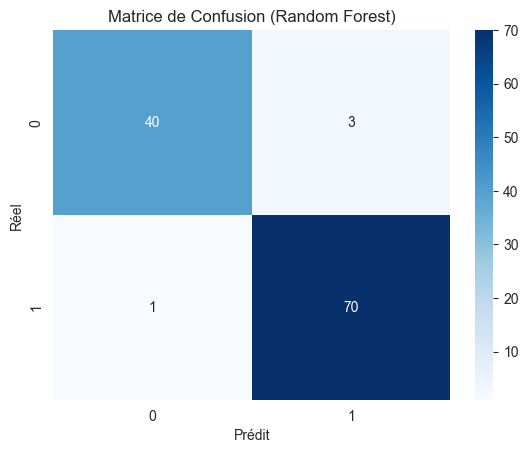

In [7]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion (Random Forest)")
plt.show()

Le dataset est bien équilibré avec une majorité de cas bénins. Les deux modèles donnent de très bonnes performances (> 95% de précision). On peut améliorer en testant d’autres modèles (SVM, KNN) ou en utilisant GridSearchCV.